In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
credit_data=pd.read_csv(r"C:\Users\DELL\Downloads\creditcard.csv\creditcard.csv")
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [42]:
credit_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

0 means legitimate, 1 means fraud.

In [43]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

StandardScaler normalizes numerical values so models converge better.

We drop raw Time and Amount after scaling to keep dataset clean.

In [45]:
credit_data['scaled_amount']=scaler.fit_transform(credit_data[['Amount']])
credit_data['scaled_time']=scaler.fit_transform(credit_data[['Time']])

In [46]:
credit_data=credit_data.drop(['Time','Amount'],axis=1)

In [47]:
scaled_amount=credit_data.pop('scaled_amount')
scaled_time=credit_data.pop('scaled_time')
credit_data.insert(0,'scaled_amount',scaled_amount)
credit_data.insert(1,'scaled_time',scaled_time)

In [48]:
from sklearn.model_selection import train_test_split
X=credit_data.drop('Class',axis=1)
y=credit_data['Class']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
#stratify=y → Keeps class proportion same in both train & test.

SMOTE creates synthetic fraud samples to balance dataset → improves model learning.


In [50]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train)
print("Before SMOTE:",y_train.value_counts())
print("After SMOTE:",y_train_res.value_counts())

Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [52]:
models={
    "Logistic Regression":LogisticRegression(max_iter=1000),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(n_estimators=100)
    
}

In [53]:
for name,model in models.items(): 
    print(f"\n----{name}----")
    model.fit(X_train_res,y_train_res)
    y_pred=model.predict(X_test)
    print(classification_report(y_test,y_pred))
    print("ROC-Auc score",roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))



----Logistic Regression----
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC-Auc score 0.9698482164390798

----Decision Tree----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.34      0.78      0.47        98

    accuracy                           1.00     56962
   macro avg       0.67      0.89      0.74     56962
weighted avg       1.00      1.00      1.00     56962

ROC-Auc score 0.8864713372687285

----Random Forest----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.81      0.82        98

    accuracy                           1.

In [54]:
best_model = RandomForestClassifier(n_estimators=100)
best_model.fit(X_train_res, y_train_res)
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)

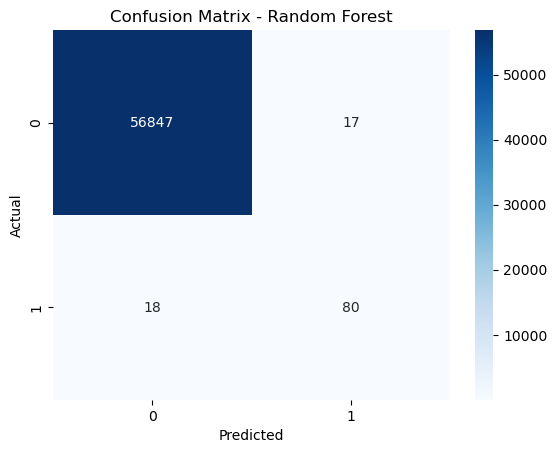

In [55]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [56]:
sample = X_test.iloc[0].values.reshape(1, -1)

# Predict fraud probability
fraud_prob = best_model.predict_proba(sample)[0][1]
prediction = best_model.predict(sample)[0]

print("Fraud Probability:", fraud_prob)
print("Prediction:", "Fraud" if prediction == 1 else "Not Fraud")

Fraud Probability: 0.0
Prediction: Not Fraud
